In [10]:
from src.utils import get_signal_by_type
import matplotlib.pyplot as plt
import numpy as np

# Mains electricity noise

Reading 10Hz_1V_neg500mV_1ms_TTX020.ns5
No. blocks 1
Block size {'segments': 1, 'groups': 1}
Segment size {'analogsignals': 1, 'epochs': 0, 'events': 0, 'irregularlysampledsignals': 0, 'spiketrains': 0, 'imagesequences': 0}
Signal shape (timestampts, signals) (300300, 32)
Time duration 10.009966666666667s


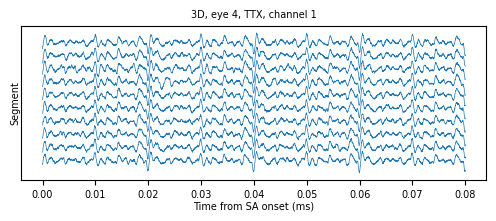

In [11]:
eye = 4
design = '3D'
channel_id = 1
experiment = 'TTX'

time, data = get_signal_by_type(eye=eye, design=design, experiment=experiment)
start = 600
sa_length = 600
response_length = 2401

plt.figure()
for i in range(10):
    chunk = data[start+(sa_length + response_length)*i+sa_length:start+(sa_length+response_length)*i+response_length+sa_length, channel_id]
    plt.plot(time[:response_length], chunk+i*700, label=f"Chunk {i}", color='tab:blue', linewidth=0.5)

plt.title(f"{design}, eye {eye}, {experiment}, channel {channel_id}")
plt.yticks([])
plt.ylabel("Segment")
plt.xlabel("Time from SA onset (ms)")
plt.gcf().set_size_inches(6, 2)
plt.savefig(f"../../figures/ttx_50hz_lineup.pdf", bbox_inches='tight')
plt.show()

# Additional SAs

In [4]:
# 3.45 seconds is how many samples if sampling rate is 30KHz
print(3.54*30000)

106200.0


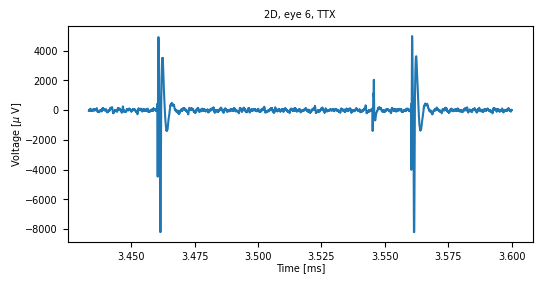

In [5]:
eye = 6
design = '2D'
experiment = 'TTX'
time, data = get_signal_by_type(eye=eye, design=design, experiment=experiment, verbose=0)
channel_id = 0
plt.figure()
plt.title(f"{design}, eye {eye}, {experiment}")
plt.plot(time[103000:108000], data[103000:108000, channel_id], label="Channel 1", color='tab:blue')
plt.gcf().set_size_inches(6, 2.8)
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [$\mu$ V]")
plt.savefig(f"../../figures/additional_sa.pdf", bbox_inches='tight')
plt.show()

# Examples of noisiness

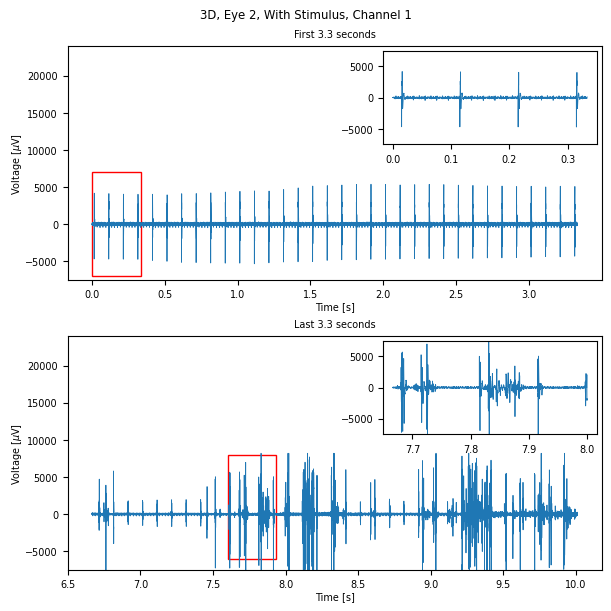

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle


eye = 2
design = '3D'
experiment = 'stimulated'
time, data = get_signal_by_type(eye=eye, design=design, experiment=experiment, verbose=0)
channel_id = 0
experiment_map = {'TTX': 'TTX', 'stimulated': 'With Stimulus', 'non-stimulated': 'Without Stimulus'}
zoom_length = 10000

fig, axs = plt.subplots(2, 1, constrained_layout=True)
fig.suptitle(f"{design}, Eye {eye}, {experiment_map[experiment]}, Channel {channel_id+1}")

axs[0].plot(time[:100000], data[:100000, channel_id], label=f"Channel {channel_id+1}", color='tab:blue', linewidth=0.6)
axs[0].set_ylim(-7500, 24000)
axs[0].set_title("First 3.3 seconds")
axs[0].set_ylabel("Voltage [$\mu$V]")
axs[0].set_xlabel("Time [s]")

inset_1 = inset_axes(axs[0], height='40%', width='40%')
inset_1.plot(time[:zoom_length], data[:zoom_length, channel_id], label=f"Channel {channel_id+1}", color='tab:blue', linewidth=0.6)
inset_1.set_ylim(-7500, 7500)

# Define the position, width, and height of the rectangle
rectangle_position = (0, -7000)       # Bottom-left corner (x, y)
rectangle_width = zoom_length/30_000  # Width of the rectangle
rectangle_height = 14000              # Height of the rectangle

# Create a rectangle
rectangle = Rectangle(rectangle_position, rectangle_width, rectangle_height, 
                      fc ='none', edgecolor='red', linewidth=1, alpha=1)  # alpha for transparency
axs[0].add_patch(rectangle)

axs[1].plot(time[200000:], data[200000:, channel_id], label=f"Channel {channel_id+1}", color='tab:blue', linewidth=0.6)
axs[1].set_ylim(-7500, 24000)
axs[1].set_title("Last 3.3 seconds")
axs[1].set_ylabel("Voltage [$\mu$V]")
axs[1].set_xlabel("Time [s]")

inset_2 = inset_axes(axs[1], height='40%', width='40%')
start = 230000
inset_2.plot(time[start:start + zoom_length], data[start:start + zoom_length, channel_id], label=f"Channel {channel_id+1}", color='tab:blue', linewidth=0.6)
inset_2.set_ylim(-7500, 7500)




# Create a rectangle
rectangle_position = (7.6, -6000)  # Bottom-left corner (x, y)
rectangle = Rectangle(rectangle_position, rectangle_width, rectangle_height, 
                      fc ='none', edgecolor='red', linewidth=1, alpha=1)  # alpha for transparency
axs[1].add_patch(rectangle)

plt.gcf().set_size_inches(6, 6)
plt.savefig(f"../../figures/noise_example.pdf", bbox_inches='tight')
plt.show()